# Individual Plan - Stephanie Ye

In [1]:
library(tidyverse)
library(dplyr)


player_url = "http://drive.google.com/uc?export=download&id=1gfwfCu-YNRc_NDVSoNmKdemC9t4lYXJs"
players_data <- read_csv(player_url)

head(players_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
sessions_url = "http://drive.google.com/uc?export=download&id=1GHKAF_hpFRGvvXghIDMrERxU2GI_33N5"

sessions_data <- read_csv(sessions_url)

head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## Data description

There are 196 oberservation and 9 variables in players table, the variables are:
1. `experience`categorical, cdecribe the experience level of players.
2. `subscribe`logical, decribe whether the players subscribe the game or not.
3. `hashedEmail`categorical, decribe the hashing encoded email addresses of players.
4. `played_hours`numeric, decribe how long the players play the game.

There are 1535 oberservations and 5 variables in sessions table, the variables are:
1. `hashedEmail` categorical, describe the hashing encoded email addresses of players.
2. `start_time` and `end_time`categorical, describe when the players start or end playing the game.
3. `original_start_time` and `original_end_time` numerical, describe the UNIX timestamp recorded by system.

## potential issues

### players

In [3]:
players_data|>
group_by(gender) |>
summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


1. In the `hashedEmail` column, the data is unreadable which may be useless.
2. There may be some extreme value in `played_hours` which may affect the final results.
3. Some categories in `gender` may be too small, such as `Other`, `Two-Spirited`. Model may cannot show the patterns of these groups.

### Sessions

In [4]:
session_date <- sessions_data |>
    separate(start_time, into = c("start_date", "start_hour"), sep = " ") |>
    separate(end_time,   into = c("end_date", "end_hour"),   sep = " ")
head(session_date)

hashedEmail,start_date,start_hour,end_date,end_hour,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


In [5]:
session_time <- session_date |>
select(hashedEmail, start_date, start_hour, end_date, end_hour)
head(session_time)

hashedEmail,start_date,start_hour,end_date,end_hour
<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10


In [6]:
duration_time <- session_time |>
    filter(start_date == end_date) |>
    mutate(start_hour_num = as.numeric(substr(start_hour, 1, 2)),
        start_min_num  = as.numeric(substr(start_hour, 4, 5)),
        end_hour_num   = as.numeric(substr(end_hour, 1, 2)),
        end_min_num    = as.numeric(substr(end_hour, 4, 5)),
        start_total = start_hour_num * 60 + start_min_num,
        end_total   = end_hour_num * 60 + end_min_num,
        duration_mins = end_total - start_total) |>
    select(start_date, start_hour, end_hour, duration_mins)
head(duration_time)

duration_mean <- duration_time |>
    summarise(mean_duration = mean(duration_mins, na.rm = TRUE))
duration_mean

start_date,start_hour,end_hour,duration_mins
<chr>,<chr>,<chr>,<dbl>
30/06/2024,18:12,18:24,12
17/06/2024,23:33,23:46,13
25/07/2024,17:34,17:57,23
25/07/2024,03:22,03:58,36
25/05/2024,16:01,16:12,11
23/06/2024,15:08,17:10,122


mean_duration
<dbl>
46.85982


In [7]:
players_hours <- players_data |>
select(hashedEmail, played_hours)
head(players_hours)

hashedEmail,played_hours
<chr>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0


In [8]:
merged_data <- full_join(session_time, players_hours, by = "hashedEmail")
head(merged_data)
tail(merged_data)

hashedEmail,start_date,start_hour,end_date,end_hour,played_hours
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,223.1
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,53.9
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,150.0
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,223.1
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,53.9
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,223.1


hashedEmail,start_date,start_hour,end_date,end_hour,played_hours
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
e1e5b1d36ab7680b6927fd3cb619c2b5373167750f90f7a21bf67b5d9b0fd73f,NA,NA,NA,NA,0
e3f0ad9aadd27f3d1d9197e58546d045018daa767675033d9af9a2b74e763739,NA,NA,NA,NA,0
8c9d043ebb3689e679a37bfed30ea96272bcd14689ed2d9fcd68a4ae0c1663bc,NA,NA,NA,NA,0
514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,NA,NA,NA,NA,0
644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,NA,NA,NA,NA,0
b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,NA,NA,NA,NA,0


1. The `hashedEmail` is unreadable, which may be useless.
2. There are sessions with a duration of 0 minutes or with very long duration . Such cases might indicate logging errors or players disconnecting immediately. These values could affect the final results of prediction model.
3. The `start_time` and `end_time` may need to convert into another form in order to calculate more easily.

## Data visualization

### players

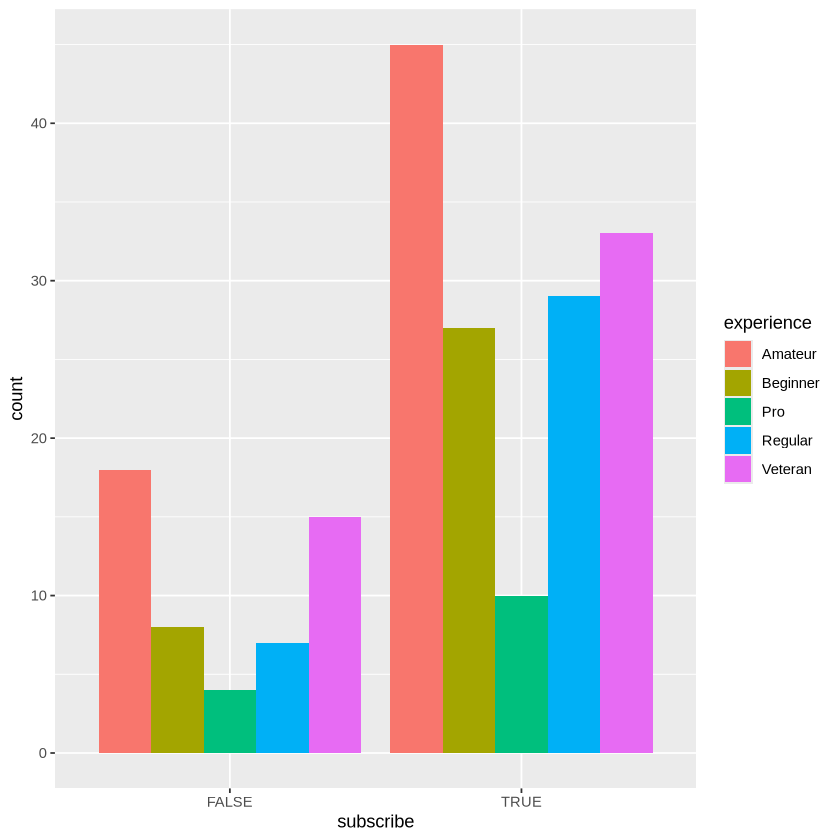

In [11]:
players_plot1 <- ggplot(players_data, aes(x = subscribe)) +
geom_bar(aes(fill = experience), position = "dodge")
players_plot1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


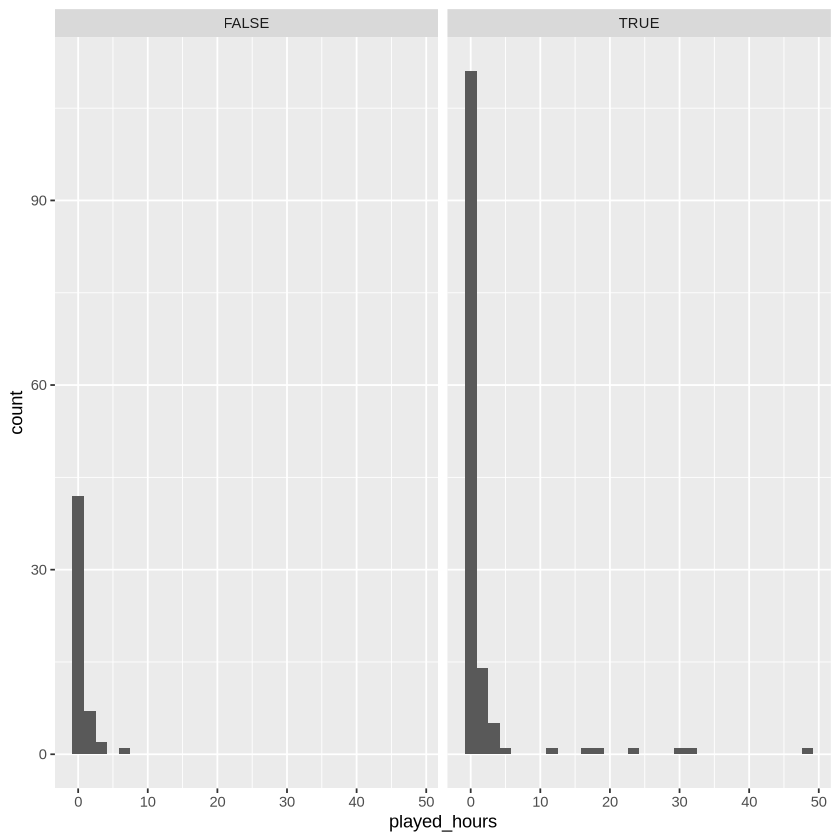

In [19]:
players_lessthan50 <- players_data |>
    filter(played_hours < 50) |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    facet_grid(cols = vars(subscribe))
players_biggerthan10

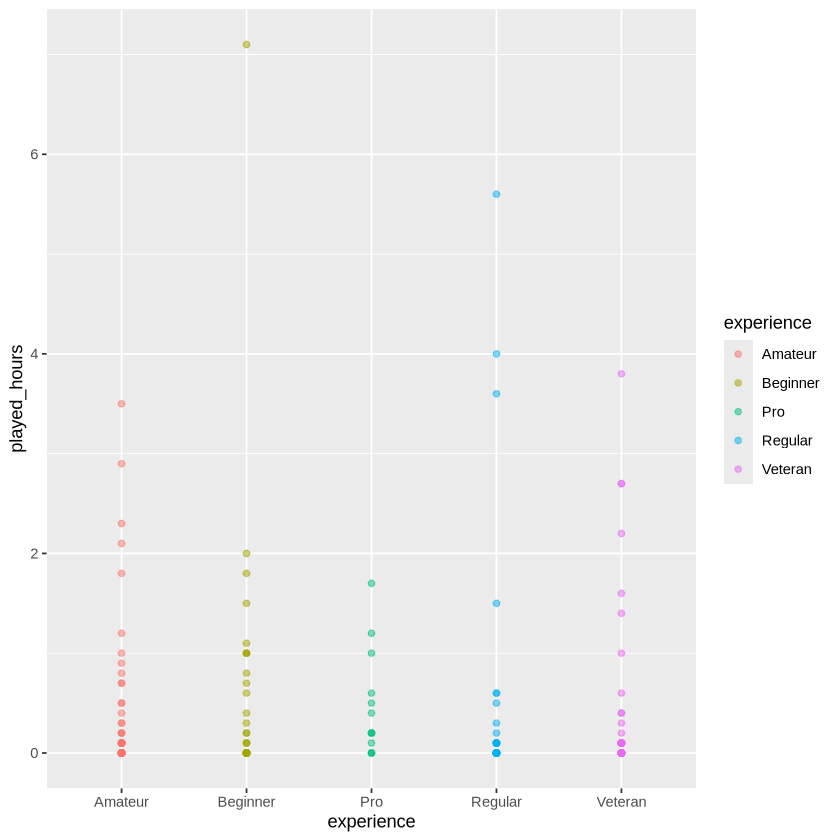

In [27]:
players_experience <- players_data |>
filter(played_hours < 10) |>
ggplot(aes(x = experience, y = played_hours, color = experience)) +
geom_point(alpha = 0.5)
players_experience

### Sessions

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


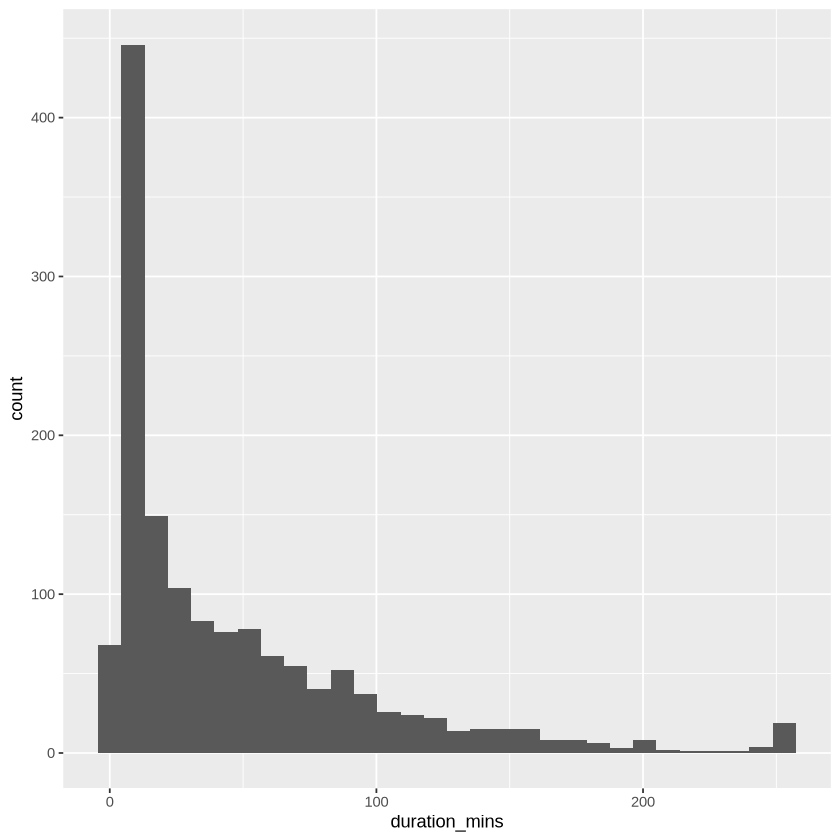

In [29]:
session_plot1 <- duration_time |>
    ggplot(aes(x = duration_mins)) +
    geom_histogram()
session_plot1

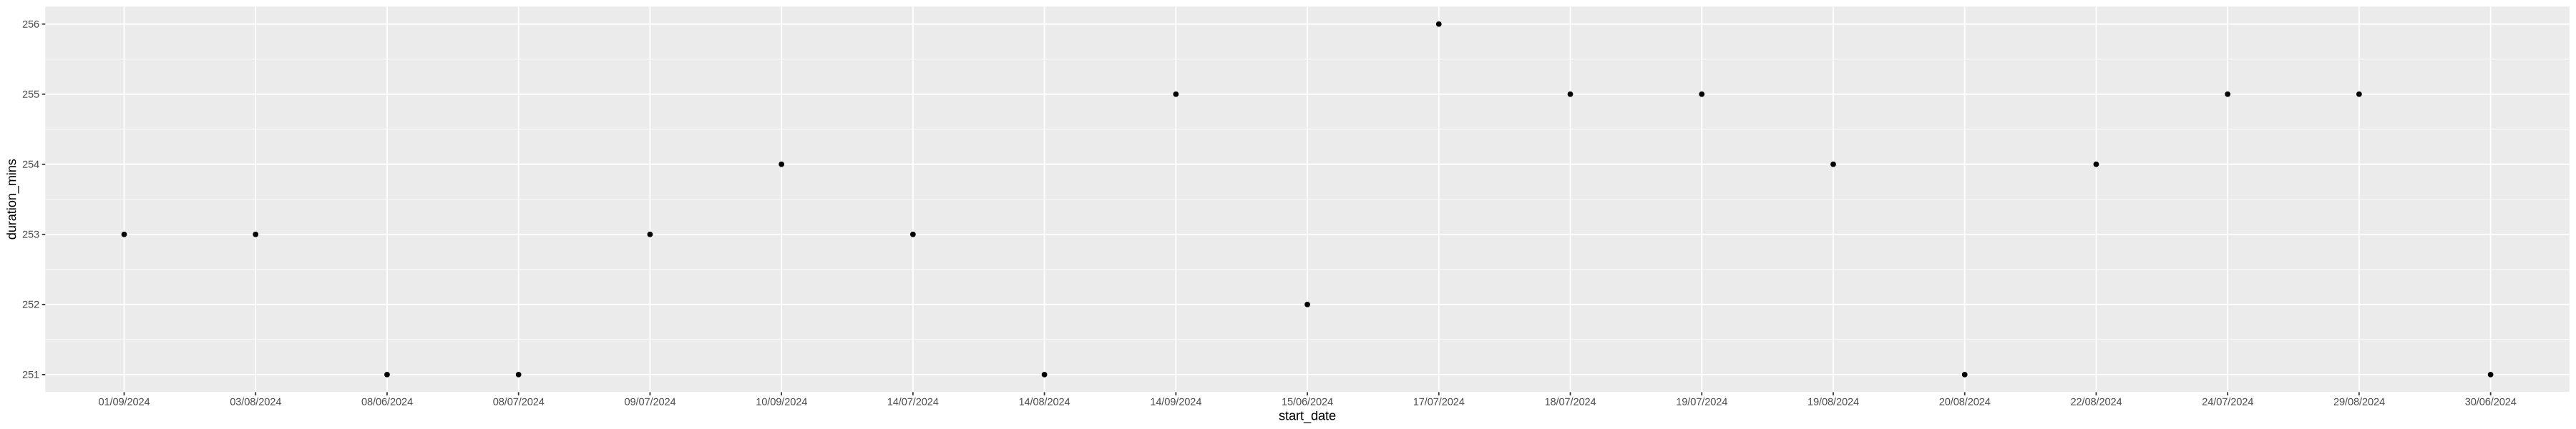

In [49]:
options(repr.plot.width = 30, repr.plot.height = 5)

session_date <- duration_time |>
    filter(duration_mins > 250) |>
    ggplot(aes(x = start_date, y = duration_mins)) +
    geom_point(alpha = 8)
session_date

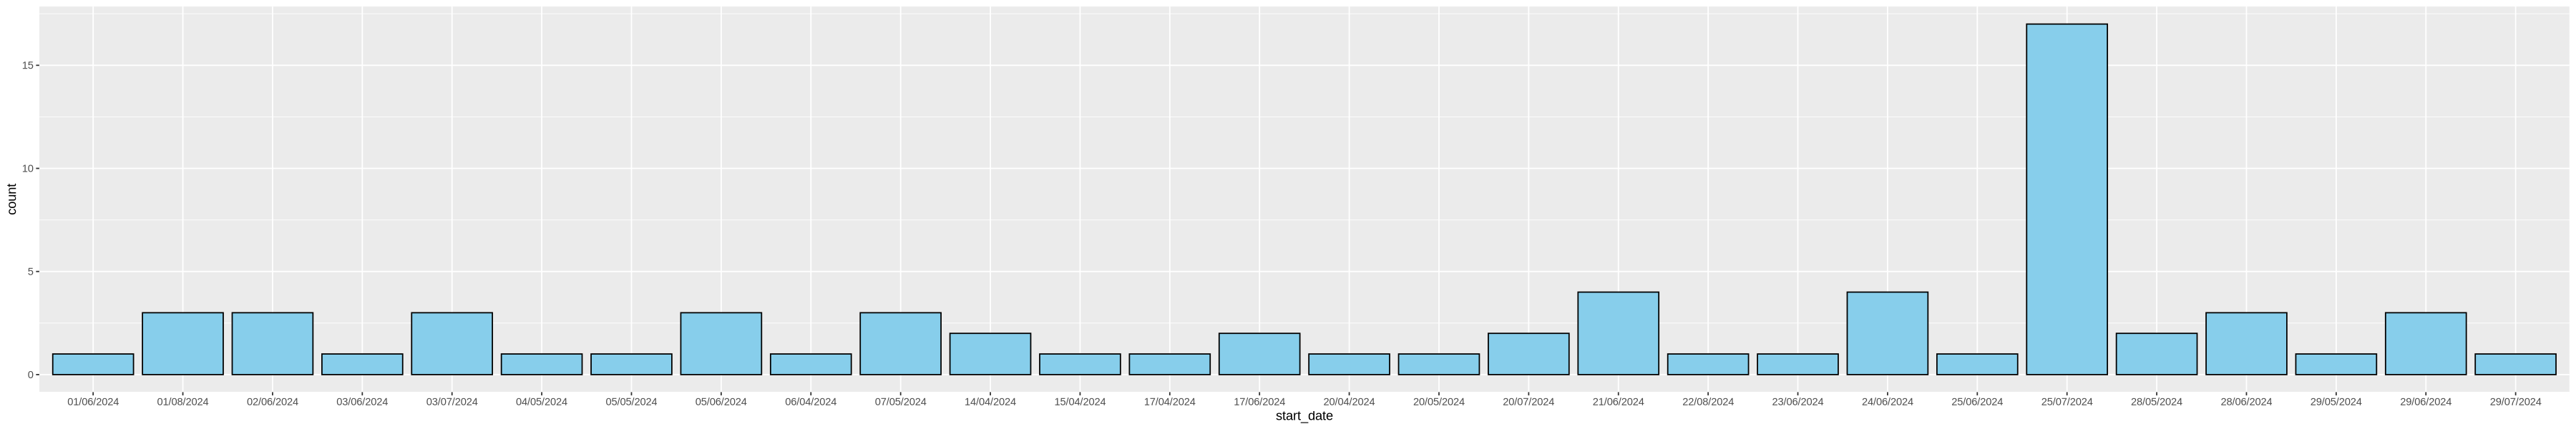

In [59]:
session_count_plot <- duration_time |>
    filter(duration_mins < 5) |>
    ggplot(aes(x = start_date)) +
    geom_bar(fill = "skyblue", color = "black")
session_count_plot

## Selected Question

I will answer question 2: `We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.`

This question aims to find which type of players tend to spend longer time on game, because longer playing time means more likely to contribute a large number of data. 
To answer this question, I will use `hashedEmail` to merge two datasets, `players.csv` and `session.csv`. The predict variable is `experience`, `subscribe` and `gender` and the response variable will be `played_hours`. I will use regression as the predict model, since the variable `played_hours` is numerical. 

Additionally, I need to convert `experience` and `gender `into numerical before the prediction. I will use ordinary encoding to convert `experience` and `subscribe` into numerical. For example, in experience colum, `Veteran`= 1, `pro`= 2, `Amateur`= 3, `Regular`= 4, `Regular` = 5.

Possible model:
As for modeling, I plan to use both knn regression and linear regression, then compare which model is better. Then, split the data into training and testing sets. 
For knn regression, I may first use cross-validation and turning k to get the best k value and then using training set to find the accuracy of traing sets.